In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("/content/green_tech_data.csv")
print(data.head())

# Check for null values
print(data.isnull().sum())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  
carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


sustainability
0    85
1    15
Name: count, dtype: int64


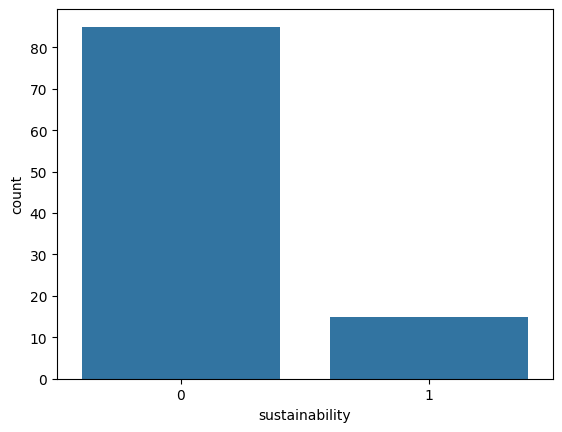

In [ ]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

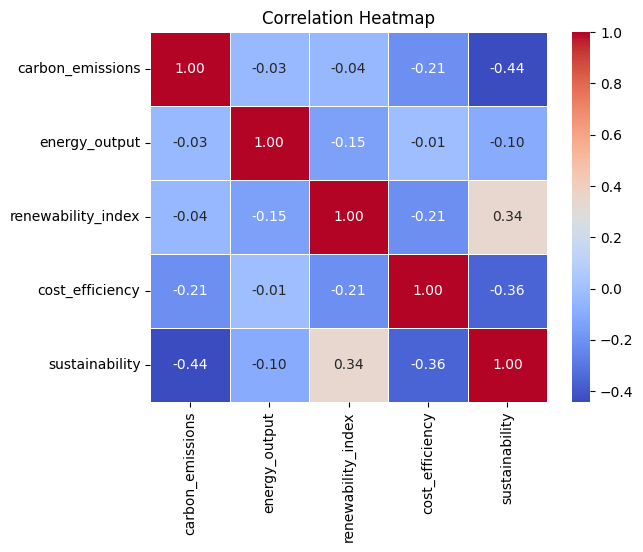

In [ ]:
corr = data.corr()
# Generate the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#define X and Y for column: carbon_emissions	energy_output	renewability_index	cost_efficiency	sustainability

X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
Y = data['sustainability']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


In [ ]:
#confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[17  0]
 [ 1  2]]


In [ ]:
#classification report
cr = classification_report(ytest, ypred)
print("Classification Report:")
cr

Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        17\n           1       1.00      0.67      0.80         3\n\n    accuracy                           0.95        20\n   macro avg       0.97      0.83      0.89        20\nweighted avg       0.95      0.95      0.95        20\n'

In [ ]:
#Feature Importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [ ]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [ ]:
import joblib
# Load the model from the file
model = joblib.load('lrmodel_sustainable.pkl')
# Example data for prediction
new_data = np.array([[22,25,60]])
# Make predictions
predictions = model.predict(new_data)
# Print the predictions
print(predictions)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
new_data = np.array([[22.49,45.33,52.33]])
predictions = model.predict(new_data)
print(predictions)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64


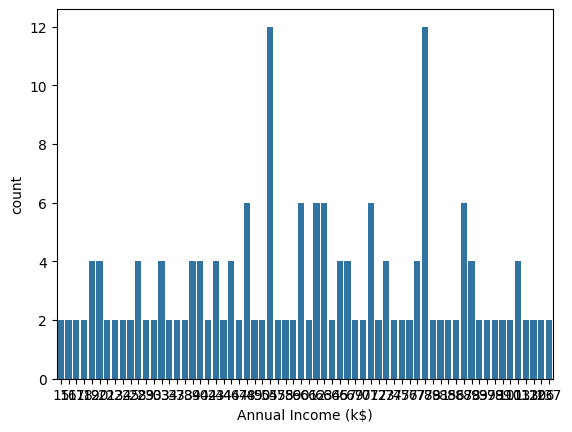

In [ ]:
# Check for class imbalance
print(df['Annual Income (k$)'].value_counts())
# Visualize class distribution
sns.countplot(x='Annual Income (k$)', data=df)
plt.show()

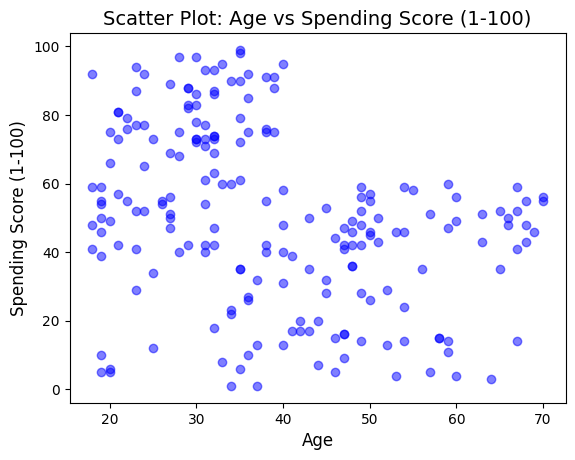

In [ ]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], color='blue', alpha=0.5)

# Add labels and title
plt.title("Scatter Plot: Age vs Spending Score (1-100)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

plt.show()

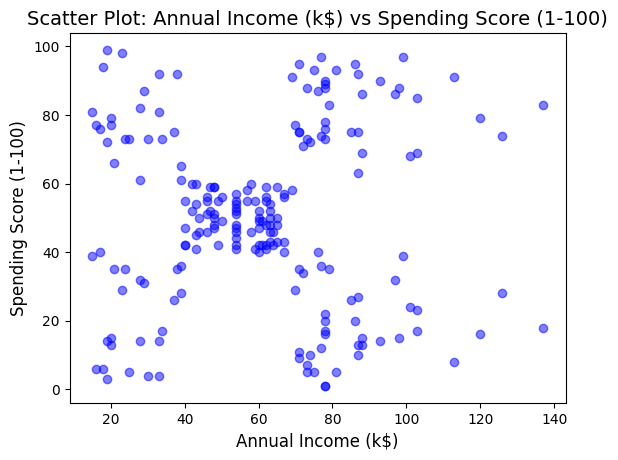

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', alpha=0.5)

# Add labels and title
plt.title("Scatter Plot: Annual Income (k$) vs Spending Score (1-100)", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

plt.show()

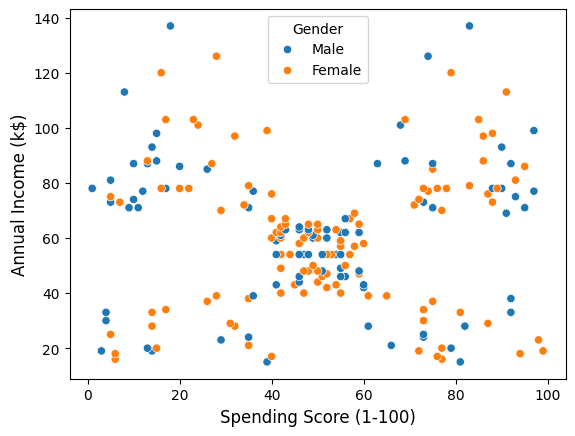

In [ ]:
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue=df['Gender'])

# Add labels and title
#plt.title("Scatter Plot: Annual Income (k$) vs Spending Score (1-100)", fontsize=14)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.xlabel("Spending Score (1-100)", fontsize=12)

plt.show()

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import seaborn as sns
uploaded = files.upload()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df = pd.read_csv("/content/agricultural_yield.csv")
df.head()

Saving agricultural_yield.csv to agricultural_yield (1).csv


,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
x = df[['carbon_emissions', 'renewability_index','cost_efficiency']]
y = df['sustainability']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

KeyError: "None of [Index(['carbon_emissions', 'renewability_index', 'cost_efficiency'], dtype='object')] are in the [columns]"

In [ ]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(4,)),
    Dense(12,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.6,random_state=42)

NameError: name 'X' is not defined

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape = (3,)),
    Dense(128, activation='relu', input_shape = (3,)),
    Dense(64, activation='relu', input_shape = (3,)),
    Dense(32, activation='relu'),
    Dense(1, activation ='sigmoid')
])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense